In [99]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

### Automatic CV recommendations system  

#### CV recommendations system: 
Recruiting is an important function in the process of human resource management, as  employee  is  seen  as  the  more  important  ones  from  the  factors  of  production. The recruiting  of  the  appropriate  person  is  a  challenge  faced by most  companies,  as well  as  the  unavailability  of  certain  candidates  in  some  skill  areas  has  long  been identified  as  a  major  obstacle  to companies’succes. 

#### Our goal:  
Our goal is making automatic resume recomandation sytem using Machine Learning. We analysis more than 600 resumes for this purpose. 


### Load the dataset

In [100]:
df = pd.read_excel('dataset.xlsx', index=False)
df.head()

,name,age,address,mobile,photo,university,degree,currentOffice,experience,designation,salary,matchingScore
0,Md. Sanoar Hossain,50.4,"Cantonment, Dhaka","01728165215, 01766900784",https://my.bdjobs.com/photos/1050001-1075000/4...,Rajshahi University,M.Com.(Accounting),Sisal Composite Ltd,21,accountant,60000,100
1,"Shifa Saleheen, (CACC +500, IELTS 7.5)",28.8,"Mirpur, Dhaka","01913907867, 01770256686",https://my.bdjobs.com/photos/825001-850000/348...,Jahangirnagar University,Master of Science,Mir Group of Companies,7,accountant,50000,100
2,MD.O.A.KIBRIA KAMAL,28.1,"Khilgaon, Dhaka",01718372603,https://my.bdjobs.com/photos/1425001-1450000/5...,Anglia Ruskin University,BA (Honors) Business (Finance),Energypac Power Generation Limited,7,accountant,40000,100
3,Naimul Bari,31.3,"Ramna, Dhaka","01816501074, 01816501074",https://my.bdjobs.com/photos/800001-825000/338...,Stamford University Bangladesh,Master of Business Administration (M.B.A),Tamijuddin Textile Mills Limited,4,accountant,45000,100
4,Subhra Chandra Deb,32.9,"Narsingdi Sadar, Narsingdi",01790082088,https://my.bdjobs.com/photos/925001-950000/389...,National University,M.B.S,Britex sportswear limited,7,accountant,35000,100


In [101]:
df.shape # Shape of the data

(3281, 12)

### Exploratory Data Analysis

#### Variable Identification 
* $name$ = Name of the job holder. 
* $age$ = age 
* $university$ = University name
* $degree$ = Study subject
* $currentOffice$ = Previous company name where he worked as employee
* $experience$ = How many years of job experience? 
* $salary$ = Previous salary 
* $matchingScore$ = Percentage of getting jobs (target column)

#### Overview of Numerical and Categorical Columns 

In [102]:
print("""
No of columns: {}
No of rows: {}
No of categorical columns: {}
No of numerical columns: {}""".format(df.shape[1], 
                                      df.shape[0],
                                      len(df.select_dtypes('O').columns),
                                      len(df.select_dtypes(['int64', 'float64']).columns)))


No of columns: 12
No of rows: 3281
No of categorical columns: 8
No of numerical columns: 4


#### Brief Summary of a DataFrame

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3281 entries, 0 to 3280
Data columns (total 12 columns):
name             3281 non-null object
age              3281 non-null float64
address          3248 non-null object
mobile           3280 non-null object
photo            3281 non-null object
university       3281 non-null object
degree           3281 non-null object
currentOffice    3051 non-null object
experience       3281 non-null int64
designation      3281 non-null object
salary           3281 non-null int64
matchingScore    3281 non-null int64
dtypes: float64(1), int64(3), object(8)
memory usage: 307.7+ KB


### catagerocial + numberical column differentiate 

In [104]:
categorical_cols = ['university', 'degree', 'currentOffice', 'designation']
numerical_col = ['age', 'experience', 'salary']

#### Statistical view of Numerical Columns

In [105]:
df[numerical_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,3281.0,31.035050,6.287937,17.8,26.7,29.8,33.9,69.5
experience,3281.0,6.037793,5.241117,0.0,2.0,5.0,8.0,38.0
salary,3281.0,38136.797318,38659.467106,0.0,20000.0,30000.0,45000.0,999000.0


### Missing value analysis

In [106]:
df[numerical_col + categorical_cols].isnull().sum()

age                0
experience         0
salary             0
university         0
degree             0
currentOffice    230
designation        0
dtype: int64

### Missing value imputation 

In [107]:
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].value_counts().idxmax())

### ploting distribution of numerical column 

<Figure size 432x288 with 0 Axes>

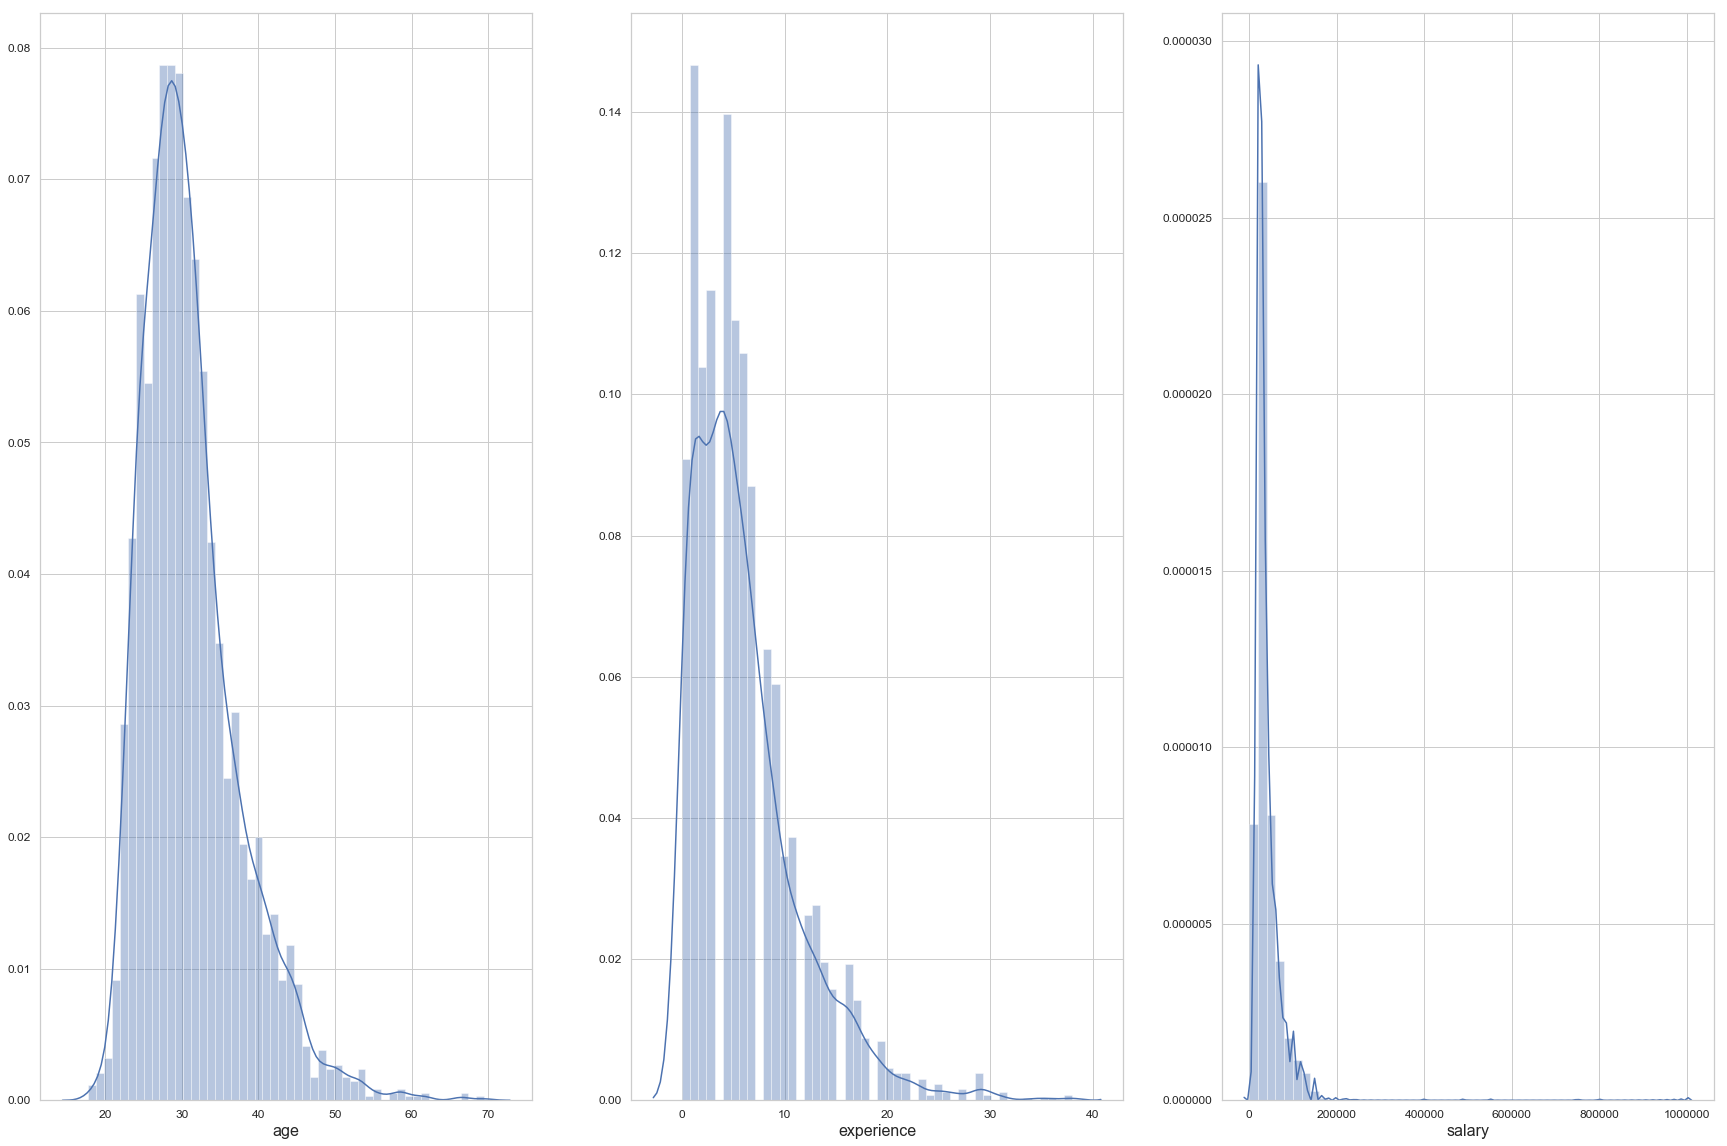

In [108]:
def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(30,20))
    sns.set_style("whitegrid")

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(data[feature])
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(df, numerical_col)

### outliers analysis 

<Figure size 432x288 with 0 Axes>

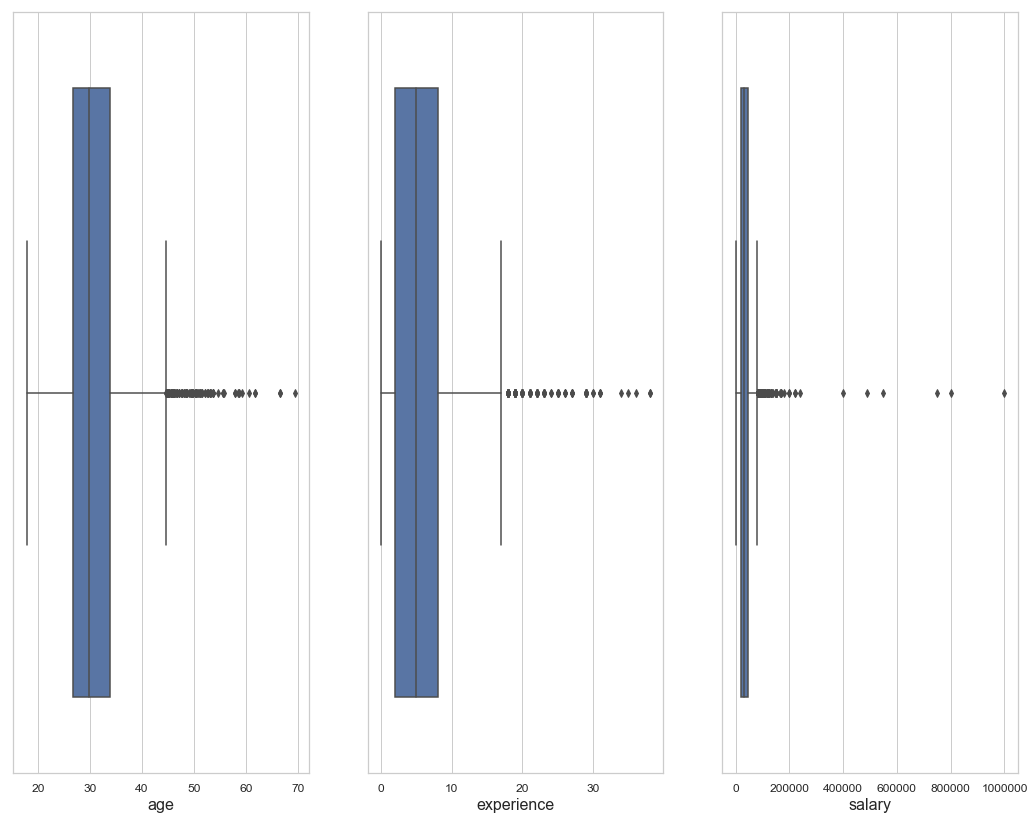

In [109]:
def plot_boxplot(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,14))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.boxplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_boxplot(df, numerical_col)

### outliers treatment 

In [110]:
def detect_outlier(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    
    return feature.index[(feature<lower_bound)|(feature>upper_bound)].tolist()

In [111]:
for col in numerical_col:
    indx = detect_outlier(df[col])
    df[col].loc[indx] = df[col].median()

In [112]:
df = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols)

In [113]:
df.shape

(3281, 3885)

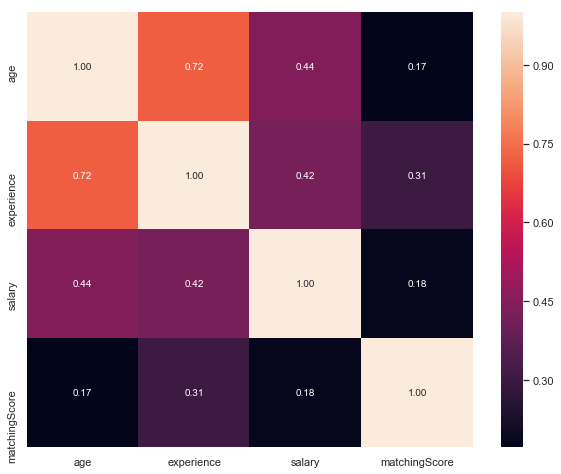

In [114]:
corr = df[numerical_col+['matchingScore']].corr()
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".2f");

In [115]:
df.drop(['name', 'address', 'mobile', 'photo'], axis=1, inplace=True)

### Data Segregation

In [116]:
X = df.loc[:,df.columns != 'matchingScore']
y = df.loc[:,df.columns == 'matchingScore']

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.10531242, -0.09861193,  1.75614198, ..., -0.3377746 ,
        -0.49799904, -0.4413942 ],
       [-0.30166978,  0.39497427,  1.13767944, ..., -0.3377746 ,
        -0.49799904, -0.4413942 ],
       [-0.43911994,  0.39497427,  0.51921689, ..., -0.3377746 ,
        -0.49799904, -0.4413942 ],
       ...,
       [ 0.48375967, -0.09861193, -1.95463328, ..., -0.3377746 ,
        -0.49799904,  2.26554856],
       [-0.73365598,  0.39497427, -1.95463328, ..., -0.3377746 ,
        -0.49799904,  2.26554856],
       [ 0.28740231, -0.34540504, -0.09924565, ..., -0.3377746 ,
        -0.49799904,  2.26554856]])

### Model

In [118]:
seed = 123
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=seed)

print("""Training datset: {},
Validation Dataset: {},
Test Dataset: {},
""".format(X_train.shape, X_val.shape, X_test.shape))

Training datset: (2099, 3880),
Validation Dataset: (525, 3880),
Test Dataset: (657, 3880),



In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import r2_score

In [120]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_lr = {
    'C': np.logspace(-5, 8, 15),
    'penalty': ['l1', 'l2']
}

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': np.arange(2,20,5)
}

In [121]:
def randomsearch(X, y, estimator, param_grid, cv=5, n_iter=10, n_jobs=2, random_state=1234):
    random = RandomizedSearchCV(estimator=estimator, 
                                param_distributions=param_grid, 
                                cv=cv, 
                                n_iter=n_iter, 
                                n_jobs=n_jobs,
                                random_state=random_state)
    random.fit(X, y)
    return random.best_params_

In [122]:
randomsearch(X_train, y_train, LogisticRegression(), param_grid_lr)

{'penalty': 'l1', 'C': 0.4393970560760795}

### Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold 

seed = 123
log_reg = LogisticRegression(penalty= 'l1', C= 0.4393970560760795).fit(X_train, y_train) # train

skf = StratifiedKFold(n_splits=10, random_state = seed)
log_reg_cv = cross_val_score(log_reg, X_train, y_train, cv=skf, scoring='accuracy') #Cross-Validation
 
log_reg_ytest = log_reg.predict(X_test) #predict

acc_test = accuracy_score(y_test, log_reg_ytest) # test accuracy

print("Logistic Regression Cross Validation Accuracy: {}".format(log_reg_cv.mean()))
print("Logistic Regression Test Accuracy: {}".format(acc_test))

Logistic Regression Cross Validation Accuracy: 0.6495075270666522
Logistic Regression Test Accuracy: 0.6788432267884322


### Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 200, random_state = seed, max_depth = 10).fit(X_train, y_train) # train

rf_cls_cv = cross_val_score(rf_classifier, X_train, y_train, cv = 10, scoring = 'accuracy') # cross-validation

rf_cls_ytest = rf_classifier.predict(X_test) # predict 
acc_test = accuracy_score(y_test, rf_cls_ytest) # test accuracy

print("Random Forest Cross validation Accuracy : {}".format(rf_cls_cv.mean()))
print("Random Forest Test Accuracy: {}".format(acc_test))

Random Forest Cross validation Accuracy : 0.4312594648947754
Random Forest Test Accuracy: 0.3576864535768645


#### Evaluating random forest with confusion matrix

In [125]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,rf_cls_ytest))  
print(classification_report(y_test,rf_cls_ytest)) 

[[  0   0   0   0   0   0   9   0   0  23]
 [  0   0   0   0   0   0   0   5   0  10]
 [  0   0   0   0   0   0  13   0   0  35]
 [  0   0   0   0   0   0   0   0   0   4]
 [  0   0   0   0   0   0   0   9   0  23]
 [  0   0   0   0   0   0   2   0   0  18]
 [  0   0   0   0   0   0  16   0   0 125]
 [  0   0   0   0   0   0   0  43   0 100]
 [  0   0   0   0   0   0   0   0   0  45]
 [  0   0   0   0   0   0   0   1   0 176]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
          25       0.00      0.00      0.00        15
          33       0.00      0.00      0.00        48
          40       0.00      0.00      0.00         4
          50       0.00      0.00      0.00        32
          60       0.00      0.00      0.00        20
          66       0.40      0.11      0.18       141
          75       0.74      0.30      0.43       143
          80       0.00      0.00      0.00        45
         100       0.31     

### K-Nearest Neighbors

In [126]:
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=5) 
KNN_classifier.fit(X_train, y_train) # train

skf = StratifiedKFold(n_splits=8)
KNN_cls_cv = cross_val_score(KNN_classifier, X_train, y_train, cv=skf, scoring='accuracy') #Cross-Validation

KNN_cls_ytest = KNN_classifier.predict(X_test) # predict

acc_test = accuracy_score(y_test, KNN_cls_ytest) # Test Accuracy 

print("KNN Cross Validation Accuracy: {}".format(KNN_cls_cv.mean()))
print("KNN Test Accuracy: {}".format(acc_test))

KNN Cross Validation Accuracy: 0.44174335615776267
KNN Test Accuracy: 0.426179604261796


#### Evaluating KNN with confusion matrix

In [127]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,KNN_cls_ytest))  
print(classification_report(y_test,KNN_cls_ytest)) 

[[ 14   0   7   0   2   0   5   2   0   2]
 [  0   3   0   0   6   1   4   1   0   0]
 [  0   3  11   0   2   0  23   4   0   5]
 [  0   0   0   0   1   3   0   0   0   0]
 [  0   5   2   0   8   0   1  11   1   4]
 [  1   1   3   0   1   9   3   1   0   1]
 [  3   2  23   0   9   2  51  13   1  37]
 [  6   4   4   0  17   1  15  70   2  24]
 [  2   0   3   0   6   2   4   8  11   9]
 [  1   0   6   0  11   1  29  25   1 103]]
              precision    recall  f1-score   support

           0       0.52      0.44      0.47        32
          25       0.17      0.20      0.18        15
          33       0.19      0.23      0.21        48
          40       0.00      0.00      0.00         4
          50       0.13      0.25      0.17        32
          60       0.47      0.45      0.46        20
          66       0.38      0.36      0.37       141
          75       0.52      0.49      0.50       143
          80       0.69      0.24      0.36        45
         100       0.56     